## Correlation

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [20]:
file = '../Data/Test_data_2017.csv'
df = pd.read_csv(file)


In [21]:
df.head()

,Country_name,year,Life_Ladder,Log_GDP_percapita,Social_support,Healthy _life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
0,Afghanistan,2017,2.662,7.697,0.491,52.8,0.427,-0.121,0.954,0.496,0.371
1,Albania,2017,4.640,9.476,0.638,68.4,0.750,-0.029,0.876,0.669,0.334
2,Algeria,2017,5.249,9.354,0.807,65.7,0.437,-0.167,0.700,0.642,0.289
3,Argentina,2017,6.039,10.067,0.907,68.6,0.832,-0.186,0.841,0.809,0.292
4,Armenia,2017,4.288,9.402,0.698,66.6,0.614,-0.147,0.865,0.625,0.437


In [22]:
df.count()

Country_name                         147
year                                 147
Life_Ladder                          147
Log_GDP_percapita                    147
Social_support                       147
Healthy _life_expectancy_at_birth    147
Freedom_to_make_life_choices         147
Generosity                           147
Perceptions_of_corruption            147
Positive_affect                      147
Negative_affect                      147
dtype: int64

In [23]:
clean_data = df.drop(columns=['Country_name', 'year'])

In [24]:
clean_data.count()

Life_Ladder                          147
Log_GDP_percapita                    147
Social_support                       147
Healthy _life_expectancy_at_birth    147
Freedom_to_make_life_choices         147
Generosity                           147
Perceptions_of_corruption            147
Positive_affect                      147
Negative_affect                      147
dtype: int64

In [25]:
clean_data.describe().round(2)

,Life_Ladder,Log_GDP_percapita,Social_support,Healthy _life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
count,147.00,147.00,147.00,147.00,147.00,147.00,147.00,147.00,147.00
mean,5.46,9.38,0.81,64.18,0.78,-0.01,0.72,0.70,0.29
std,1.14,1.19,0.12,7.03,0.13,0.16,0.19,0.11,0.09
min,2.66,6.82,0.32,45.20,0.43,-0.29,0.16,0.42,0.11
25%,4.62,8.48,0.73,58.95,0.71,-0.14,0.66,0.62,0.22
50%,5.55,9.49,0.83,66.00,0.81,-0.03,0.78,0.72,0.28
75%,6.25,10.37,0.90,68.95,0.88,0.09,0.85,0.79,0.35
max,7.79,11.63,0.97,76.50,0.98,0.65,0.95,0.90,0.60


In [26]:
my_data=clean_data 

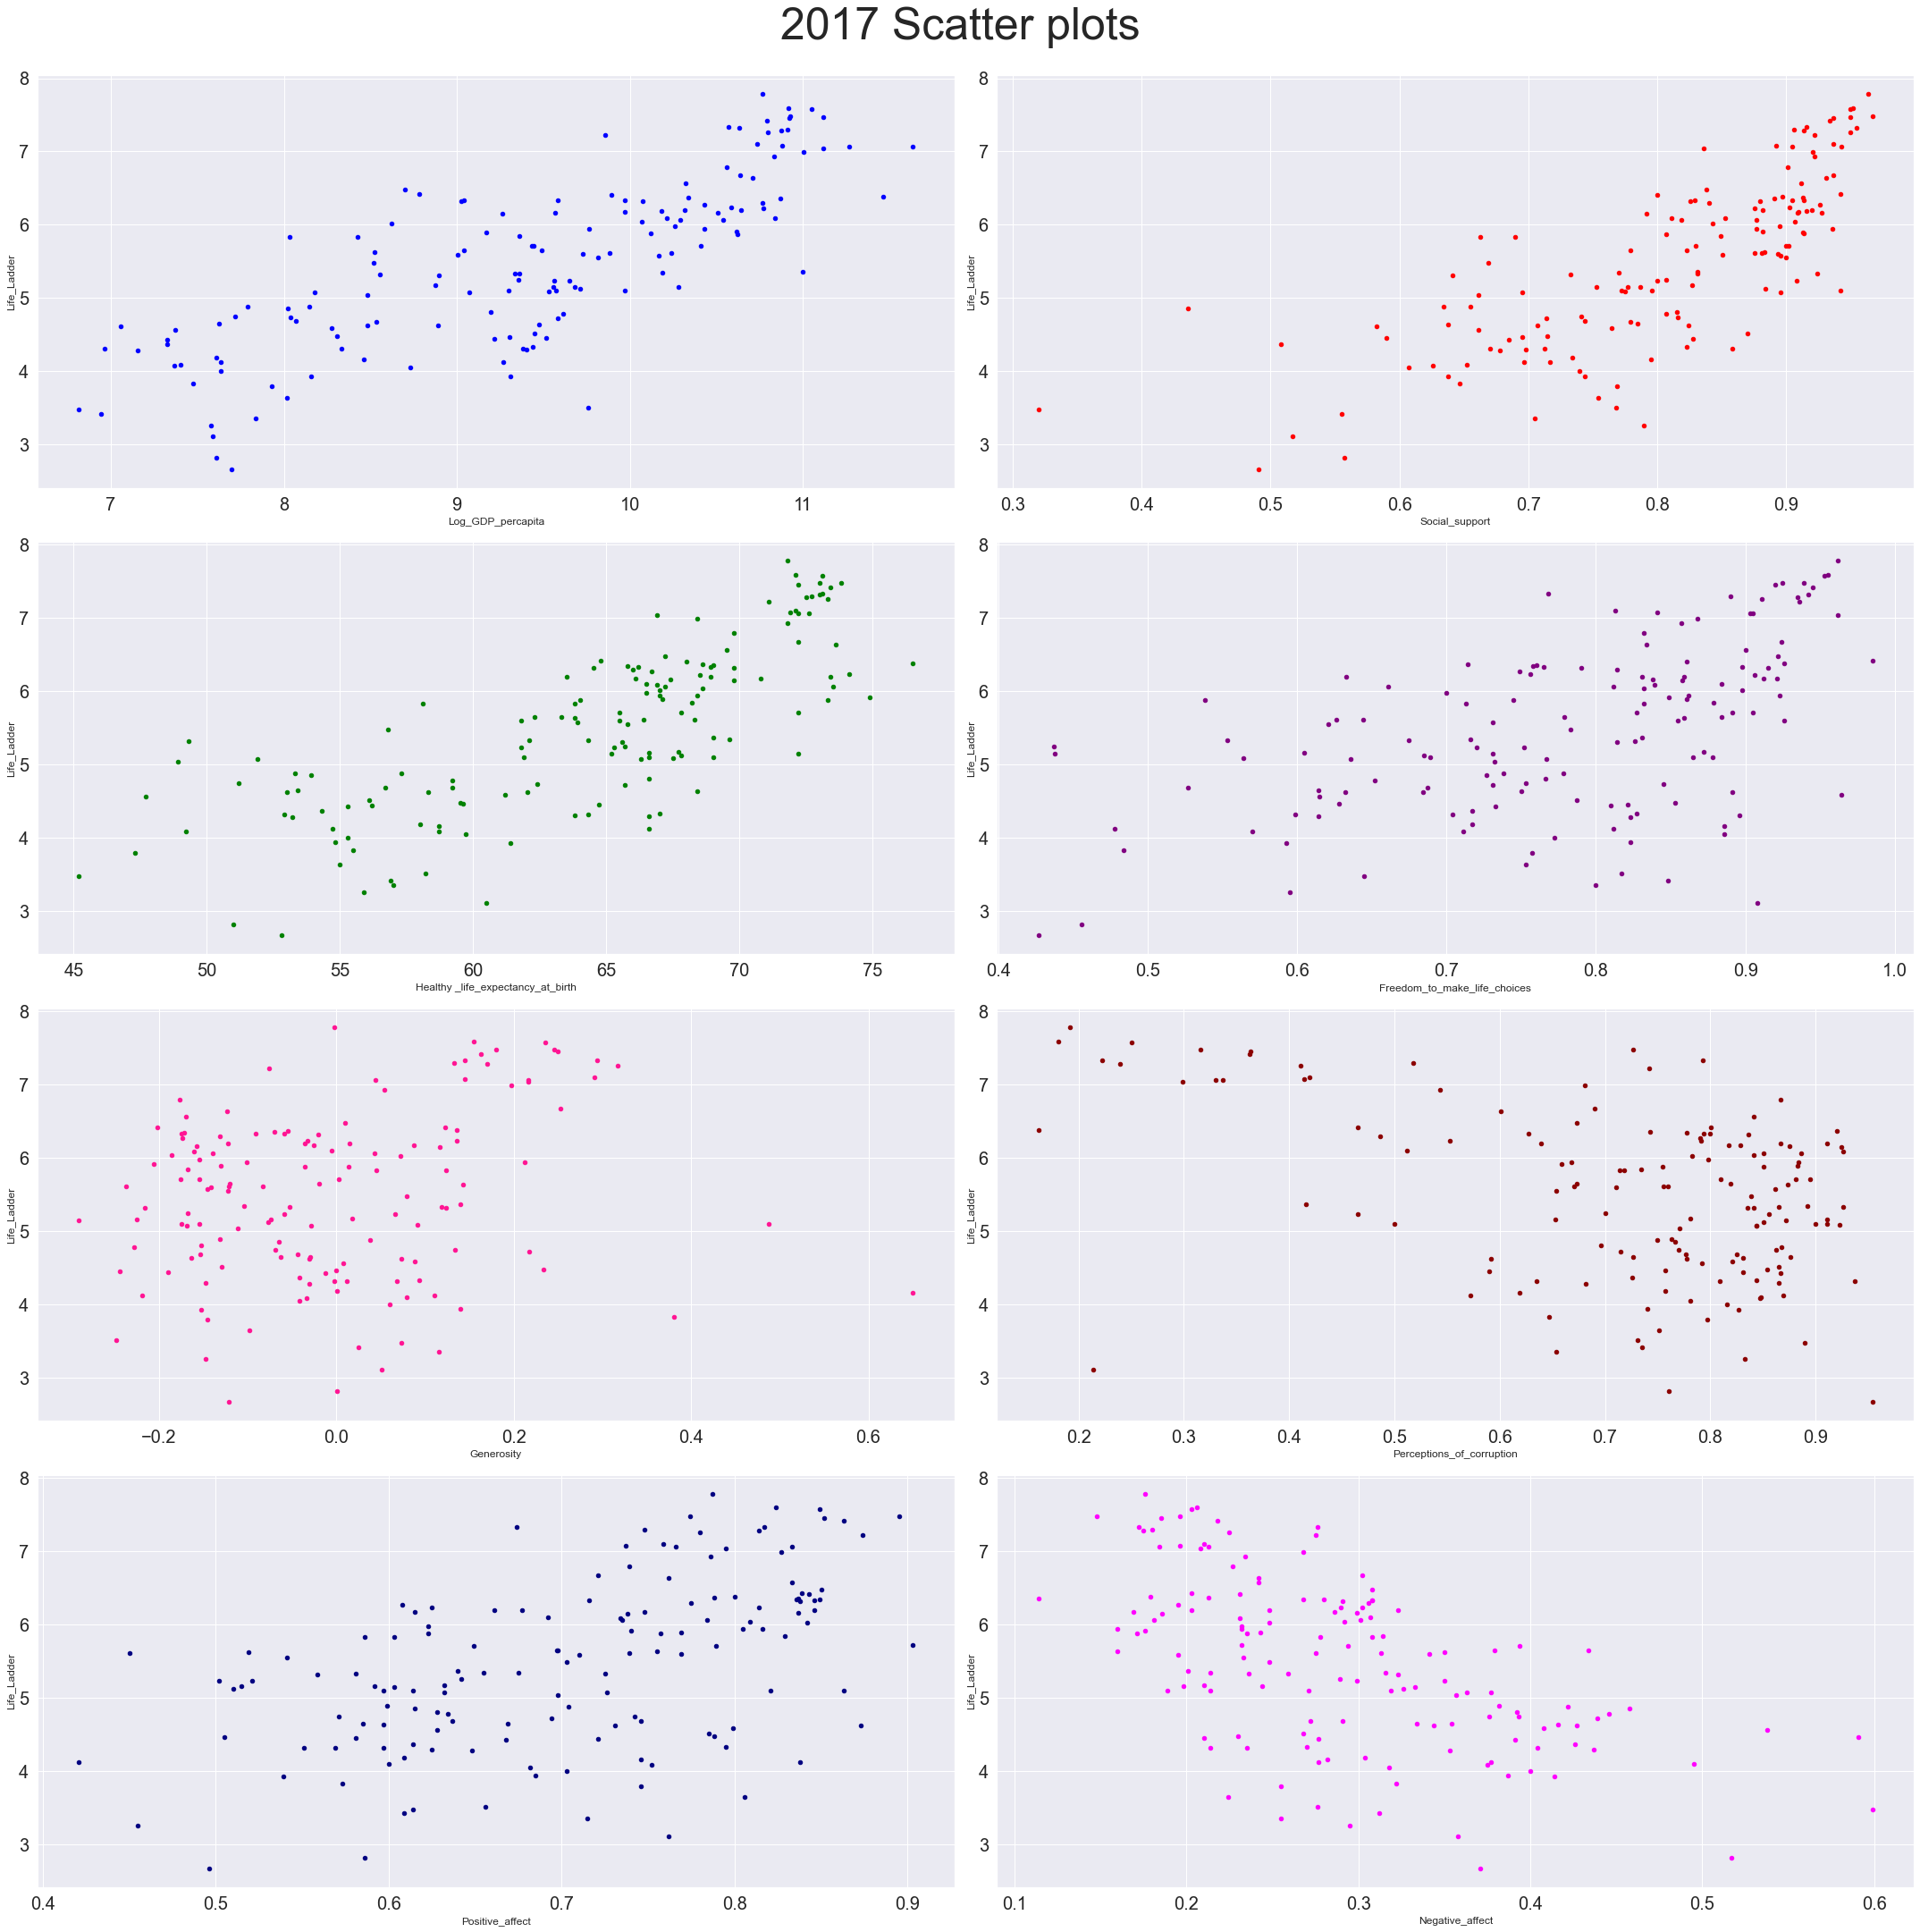

In [107]:
fig, axs = plt.subplots(nrows=4, ncols=2, sharey=False)
#plt.subplots_adjust(wspace=0.05, hspace=0.25)
plt.suptitle('2017 Scatter plots', x=0.5 ,y=1, fontsize=50)

df.plot(kind='scatter', x='Log_GDP_percapita', y='Life_Ladder', ax=axs[0,0], color='blue', figsize=(30, 30), fontsize=20)
df.plot(kind='scatter', x='Social_support', y='Life_Ladder', color='red',ax=axs[0,1], fontsize=20)
df.plot(kind='scatter', x='Healthy _life_expectancy_at_birth',y='Life_Ladder', color='green',ax=axs[1,0],fontsize=20)
df.plot(kind='scatter', x='Freedom_to_make_life_choices', y='Life_Ladder', color='purple',ax=axs[1,1], fontsize=20)
df.plot(kind='scatter', x='Generosity', y='Life_Ladder', color='deeppink', ax=axs[2,0], fontsize=20)
df.plot(kind='scatter', x='Perceptions_of_corruption', y='Life_Ladder', color='darkred', ax=axs[2,1], fontsize=20)
df.plot(kind='scatter', x='Positive_affect', y='Life_Ladder', color='navy', ax=axs[3,0], fontsize=20)
df.plot(kind='scatter', x='Negative_affect', y='Life_Ladder', color='magenta', ax=axs[3,1], fontsize=20)
#df.plot(kind='scatter', x=X, y= y_prediction)
plt.tight_layout()

plt.savefig('scatter_plot_v1')
plt.show()

In [238]:
corr_matrix=my_data.corr()

In [240]:
print(corr_matrix["Life_Ladder"].sort_values(ascending=False))

Life_Ladder                          1.000000
Log_GDP_percapita                    0.794733
Healthy _life_expectancy_at_birth    0.767911
Social_support                       0.761054
Freedom_to_make_life_choices         0.532765
Positive_affect                      0.520966
Generosity                           0.198512
Perceptions_of_corruption           -0.434806
Negative_affect                     -0.575034
Name: Life_Ladder, dtype: float64


#### Showing Correlation of the columns using Python's Seaborn

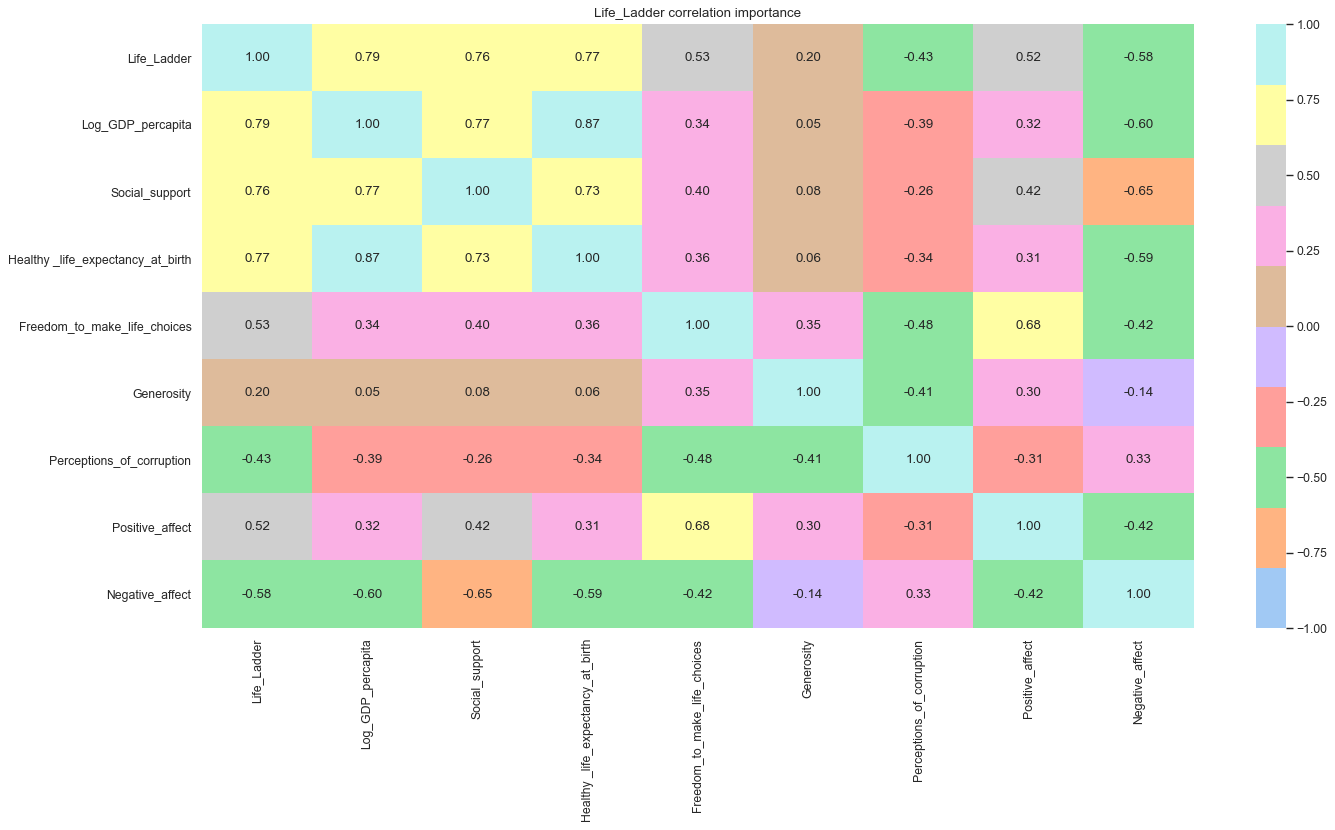

In [241]:
# Heatmap of the Correlation Matrix
import seaborn as sb; sb.set_theme()
import matplotlib as mpl
fig, ax= plt.subplots(1, 1, figsize=(20, 10))
cmap = sb.color_palette('pastel', as_cmap=True)

#cmpap=mpl.cm.cool
#cmap = sb.diverging_palette(, as_cmap=True, n=20)
sb.heatmap(clean_data.corr(), vmin = -1, vmax = 1,annot = True, fmt = ".2f", cmap=cmap)
ax.set_title('Life_Ladder correlation importance')
plt.savefig('heatmap_seaborn_20017_v1')

#### Heatmap of correlation of the columns using plotly

In [242]:
import plotly.express as px

fig = px.imshow(clean_data.corr())
fig.show()